In [1]:
import pandas as pd 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

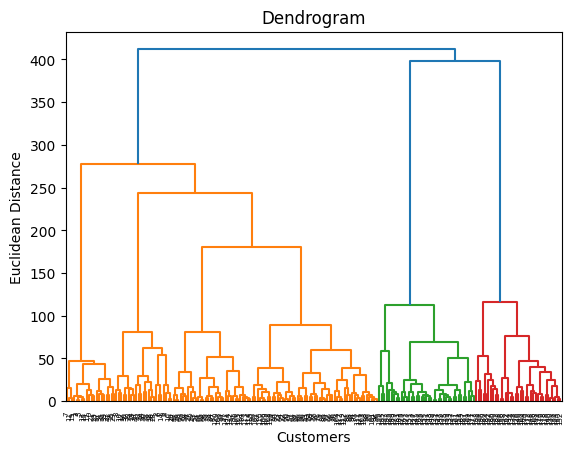

In [5]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [6]:
n_clusters = 5
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hc.fit_predict(X)

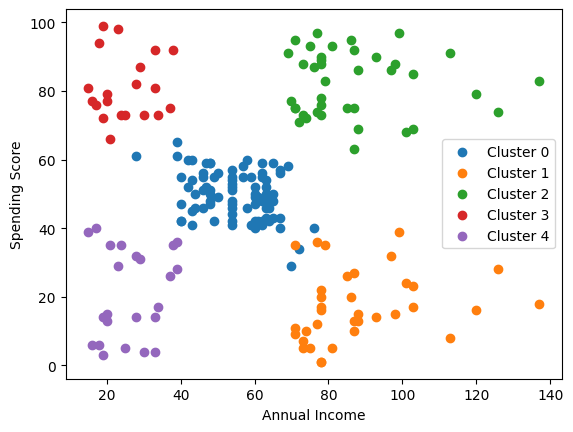

In [8]:
df['Cluster'] = cluster_labels
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label = f'Cluster {cluster}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()